# Assignment Instructions:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set) or you can also run the below cell and load the data directly. 
2. Perform a similar anlaysis as done in the reference notebook on this dataset.


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# we are reading the data directly from raw github link
# we are also defining the name of the columns.
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### 1.1 Analyze high level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
- You have to write all of your observations in Markdown cell with proper formatting.You can go through the following blog to understand formatting in markdown cells - https://www.markdownguide.org/basic-syntax/
- Do not write your observations as comments in code cells.
- Write comments in your code cells in order to explain the code that you are writing. Proper use of commenting can make code maintenance much easier, as well as helping make finding bugs faster. 
- You can add extra cells using <b>Insert cell below command</b> in Insert tab. You can also use the shortcut Alt+Enter
- It is a good programming practise to define all the libraries that you would be using in a single cell

In [58]:
print(df.shape)

(306, 4)


#### Observation:-
* There are 306 data points and 4 features.

In [59]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


#### Observaton:-
* The column names are: age, year, nodes and status.

In [60]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

#### Observaton:-
* Dataset is imbalanced with 73.5% of datapoints being class '1' and 26.5% datapoints being class '2'.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


#### Observations:
* There are no missing values in this dataset.

In [62]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observation:
* The age of patients varies from 30 to 83 with a median age of 52.
* The maximum number of positive nodes observed is 52.
* 25% of patients have 0 nodes.
* 50% of patients have 1 positive node.
* Nearly 75% of the patients have less than 4 positive nodes and nearly 25% of the patients have no positive nodes.
* Patient's year of operation are between 1958 to 1969.

### 1.2 - Explain the objective of the problem.
(The objective for a problem can be defined as a brief explanation of problem that you are trying to solve using the given dataset)

The objective: Using given dataset we are trying to find insight inside the data.

### Objective:-
* By Using given Haberman's Survival dataset, Our objective is to predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment, and the number of positive nodes.

### 1.3 Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots
- Plot the required charts to understand which feature are important for classification.
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each plot.

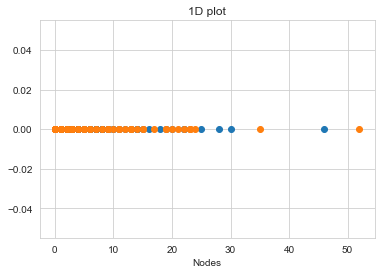

In [63]:
df_status1 = df.loc[df['status'] == 1]
df_status2 = df.loc[df['status'] == 2]

plt.plot(df_status1["nodes"], np.zeros_like(df_status1["nodes"]), 'o')
plt.plot(df_status2['nodes'], np.zeros_like(df_status2['nodes']), 'o')
plt.title('1D plot')
plt.xlabel('Nodes')
plt.show()

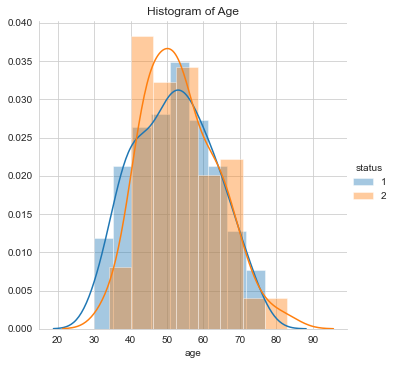

In [64]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "age").add_legend()
plt.title('Histogram of Age')
plt.show()

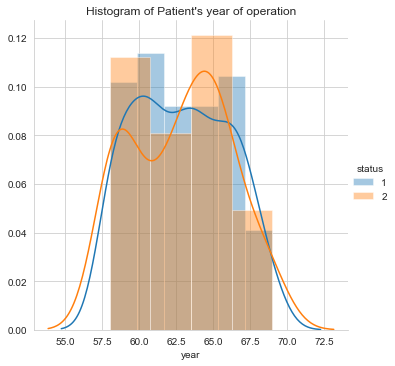

In [65]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "year").add_legend()
plt.title("Histogram of Patient's year of operation")
plt.show()

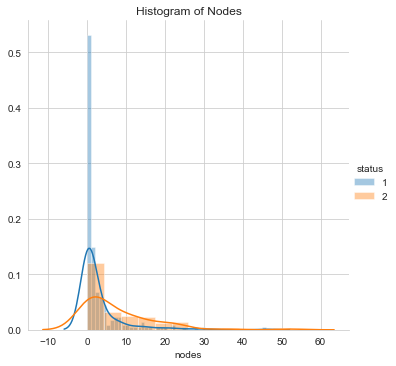

In [66]:
sns.FacetGrid(df, hue="status", height=5).map(sns.distplot, "nodes").add_legend()
plt.title('Histogram of Nodes')
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


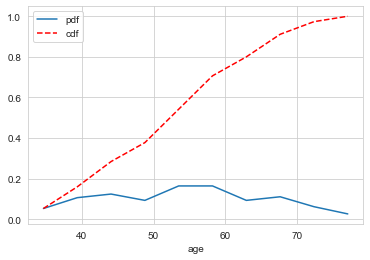

In [67]:
counts, bin_edges = np.histogram(df_status1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, '--r', label='cdf')

plt.legend()
plt.xlabel('age')

plt.show()

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


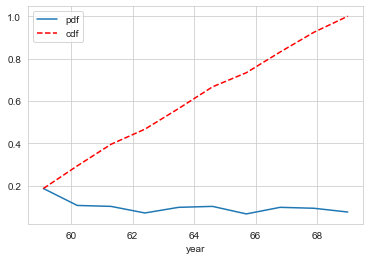

In [68]:
counts, bin_edges = np.histogram(df_status1['year'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, '--r', label='cdf')

plt.legend()
plt.xlabel('year')

plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


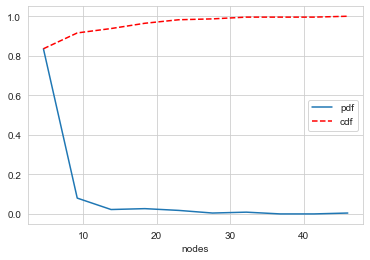

In [69]:
counts, bin_edges = np.histogram(df_status1['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='pdf')
plt.plot(bin_edges[1:], cdf, '--r', label='cdf')

plt.legend()
plt.xlabel('nodes')

plt.show()

#### Observation:-
* Almost 90% of the patients have less than 10 positive nodes 
  and almost 80% of the patients have less than or equal to 5       positive nodes.

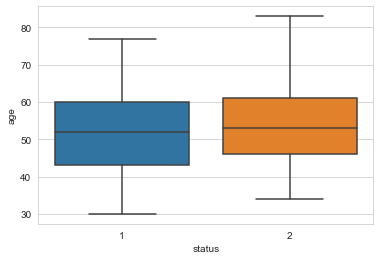

In [70]:
sns.boxplot(x='status', y='age', data=df)
plt.show()

#### Observation:-
* The patients who's age is below 35 have more higher chance to surive than rest.

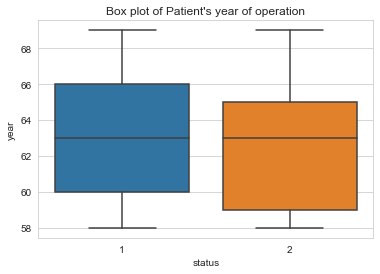

In [71]:
sns.boxplot(x='status', y='year', data=df).set_title("Box plot of Patient's year of operation")
plt.show()

#### Observations:-
* The patients treated after 1966 have the slighlty higher chance to surive than the rest.
* The patients treated before 1959 have the slighlty lower chance to surive than the rest.

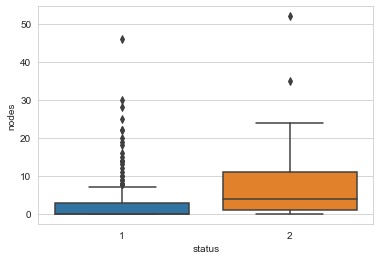

In [72]:
sns.boxplot(x='status', y='nodes', data=df)
plt.show()

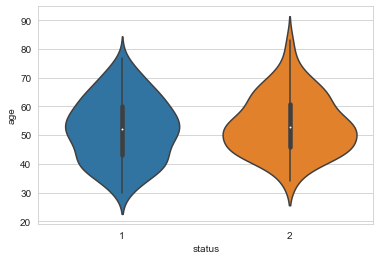

In [73]:
sns.violinplot(x='status', y='age', data=df, size=8)
plt.show()

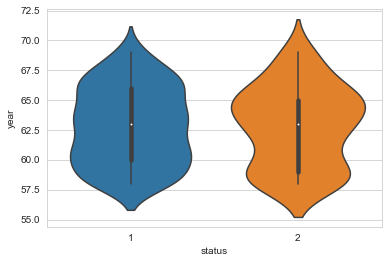

In [74]:
sns.violinplot(x='status', y='year', data=df, size=8)
plt.show()

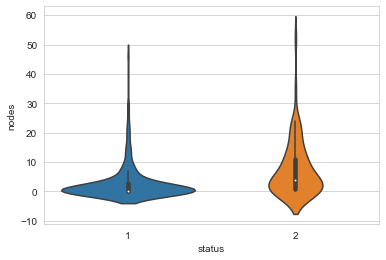

In [75]:
sns.violinplot(x='status', y='nodes', data=df, size=8)
plt.show()

### 1.4 Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots
- Plot the required Scatter plots and Pair plots of different features to see which combination of features are useful for clasification task
- Make sure that you add titles, legends and labels for each and every plots.
- Suppress the warnings you get in python, in that way it makes your notebook more presentable. 
- Do write observations/inference for each  plot.


### 2-D Scatter Plots

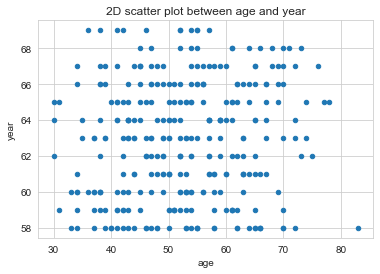

In [76]:
df.plot(kind='scatter', x='age', y='year')
plt.title('2D scatter plot between age and year')
plt.show()

**Observation(s):**
1. In the plot between age and year, We cannot make much sense out of it.

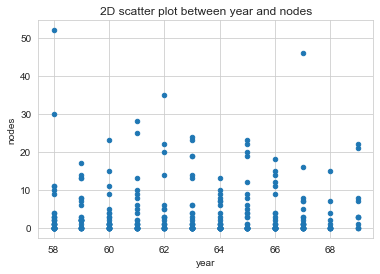

In [77]:
df.plot(kind='scatter', x='year', y='nodes')
plt.title('2D scatter plot between year and nodes')
plt.show()

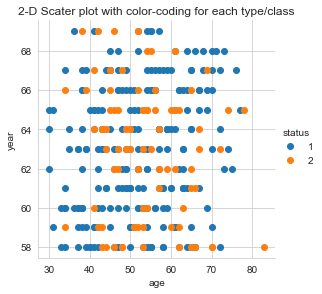

In [78]:
# 2-D Scatter plot with color-coding for each class using seaborn.
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='status', height=4).map(plt.scatter, "age", "year").add_legend()
plt.title('2-D Scater plot with color-coding for each type/class')
plt.show()

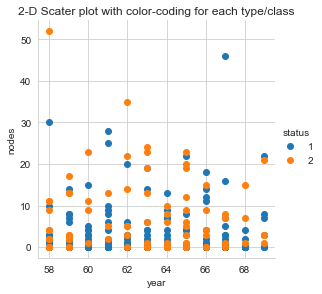

In [79]:
# 2-D Scatter plot with color-coding for each class using seaborn.
sns.set_style('whitegrid')
sns.FacetGrid(df, hue='status', height=4).map(plt.scatter, "year", "nodes").add_legend()
plt.title('2-D Scater plot with color-coding for each type/class')
plt.show()

**Observation(s):**
1. In the plot between year and nodes, The are some information. We can observe that the majorirty data points have
    0 to 10 nodes only some of then have higher value than 10.

### Pair Plots

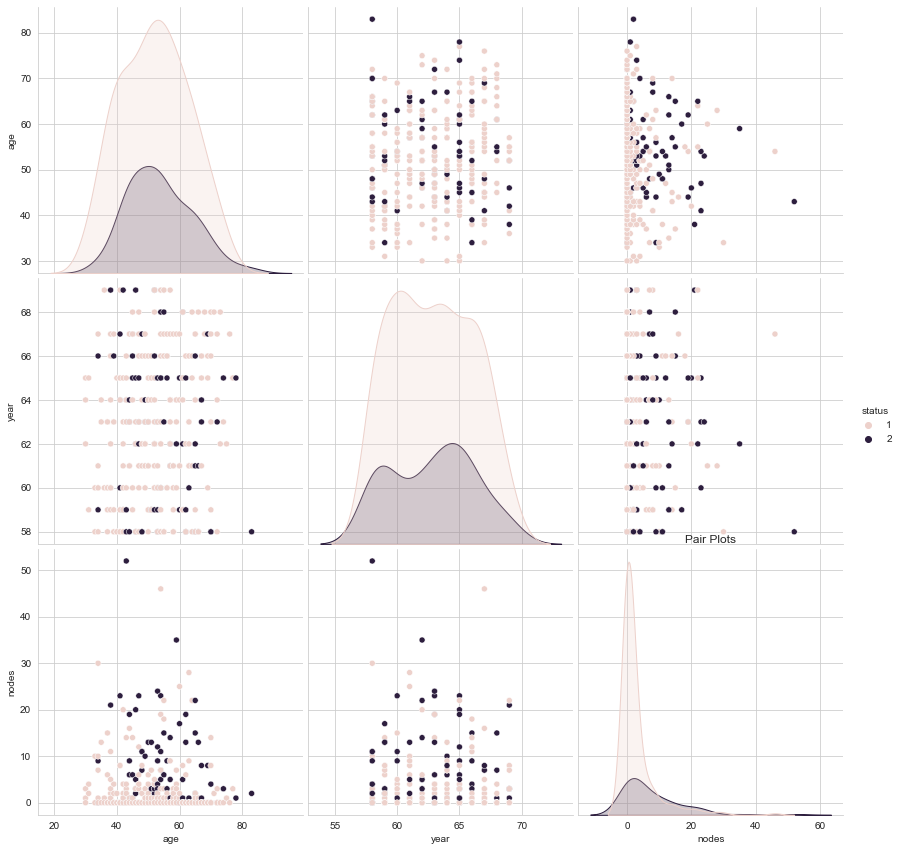

In [80]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue='status', height=4)
plt.title('Pair Plots')
plt.show()

#### Observation:-
* By using pair plot between year(year of treatment) and nodes(positive nodes), we can see the better seperation between the two clases than other plots.

### 1.5 Summarize your final conclusions of the Exploration
- You can desrcibe the key features that are important for the Classification task.
- Try to quantify your results i.e. while writing observations include numbers,percentages, fractions etc.
- Write a brief of your exploratory analysis in 3-5 points
- Write your observations in english as crisply and unambigously as possible.

### Summary:
* <h6>Key features:</h6> Year of treatment(year) and Positive Nodes(nodes) are the key features.
* The age of patients varies from 30 to 83 with a median age of 52.
* 25% of patients have 0 nodes.
* 50% of patients have 1 positive node.
* Nearly 75% of the patients have less than 4 positive nodes and nearly 25% of the patients have no positive nodes.
* Patient's year of operation are between 1958 to 1969.
* Almost 90% of the patients have less than 10 positive nodes 
  and almost 80% of the patients have less than or equal to 5       positive nodes.
* The patients who's age is below 35 have more higher chance to surive than rest.
* The patients treated after 1966 have the slighlty higher chance to surive than the rest.
* The patients treated before 1959 have the slighlty lower chance to surive than the rest.